In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housetrain.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [4]:
df.shape

(1168, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

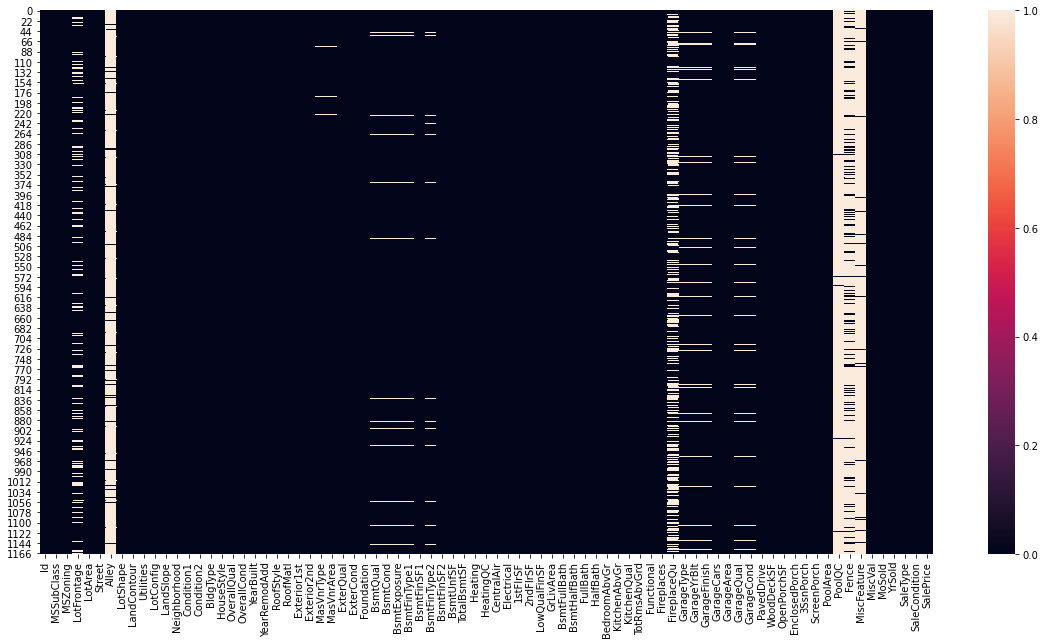

In [7]:
plt.figure(figsize=(20,10))


sns.heatmap(df.isnull())


In [8]:
#Missinf Features of  Dataset
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

LotFrontage 18.3219 % missing values
Alley 93.4075 % missing values
MasVnrType 0.5993 % missing values
MasVnrArea 0.5993 % missing values
BsmtQual 2.5685 % missing values
BsmtCond 2.5685 % missing values
BsmtExposure 2.6541 % missing values
BsmtFinType1 2.5685 % missing values
BsmtFinType2 2.6541 % missing values
FireplaceQu 47.1747 % missing values
GarageType 5.4795 % missing values
GarageYrBlt 5.4795 % missing values
GarageFinish 5.4795 % missing values
GarageQual 5.4795 % missing values
GarageCond 5.4795 % missing values
PoolQC 99.4007 % missing values
Fence 79.7089 % missing values
MiscFeature 96.2329 % missing values


# droping columns having more than 40% null values 

In [9]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
df["LotFrontage"]=df["LotFrontage"].fillna((df["LotFrontage"].mean()))

In [11]:
df["MasVnrType"]=df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

In [12]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

In [13]:
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [14]:
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

In [15]:
df["BsmtExposure"]=df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])

In [16]:
df["BsmtFinType1"]=df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])

In [17]:
df["BsmtFinType2"]=df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

In [18]:
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])

In [19]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])

In [20]:
df["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

In [21]:
df["GarageQual"]=df["GarageQual"].fillna(df["GarageQual"].mode()[0])

In [22]:
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [23]:
#Missinf Features of  Dataset
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

FireplaceQu 47.1747 % missing values


In [24]:
df["FireplaceQu"]=df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

In [25]:
#Missinf Features of  Dataset
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

<AxesSubplot:>

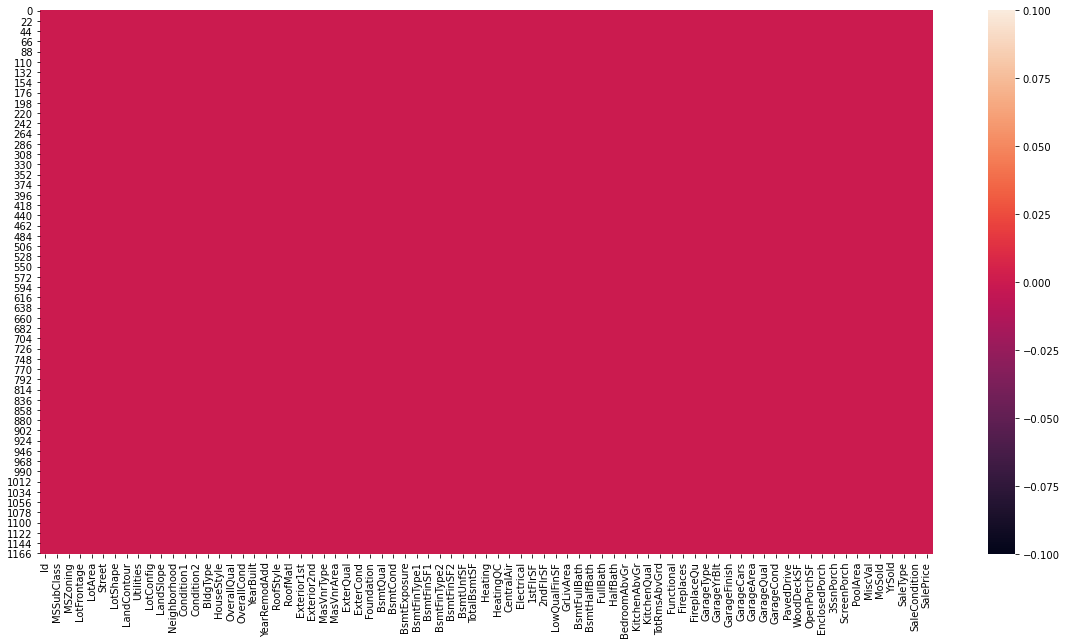

In [26]:
plt.figure(figsize=(20,10))


sns.heatmap(df.isnull())


all null values are removed 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

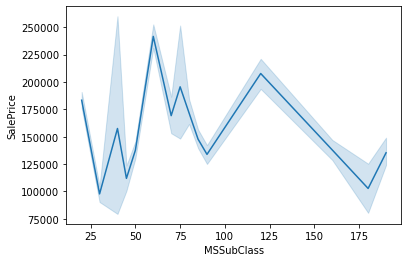

In [28]:
sns.lineplot(x='MSSubClass',y='SalePrice',data=df)

ealiear 2-STORY 1946 & NEWER
        -STORY 1945 & OLDER  were in the demand but later as per the trend 2-STORY 1946 & NEWER
        2-STORY 1945 & OLDER (its sales are increasing the most )

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

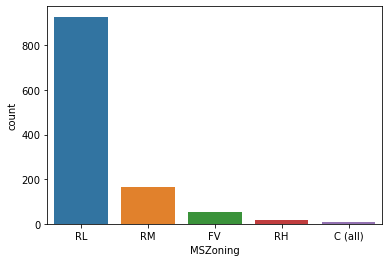

In [29]:
sns.countplot(df['MSZoning'],data=df)

mostly Residential Low Density is in demand 

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

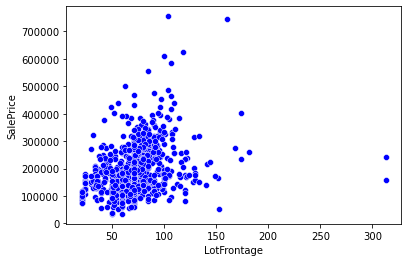

In [30]:
sns.scatterplot(x="LotFrontage",y="SalePrice",data=df,color='blue')

mostly lot size is nearly between 50 to 100 but sometimes price increase with increse in lotfrontage

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

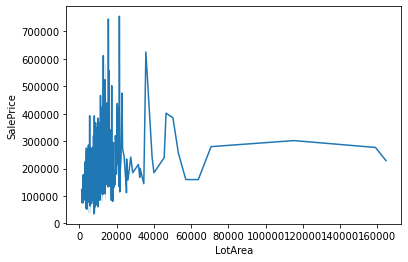

In [31]:
sns.lineplot(x="LotArea",y="SalePrice",data=df)

intially price were high but with increase of lot areas price are constant 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Street', ylabel='count'>

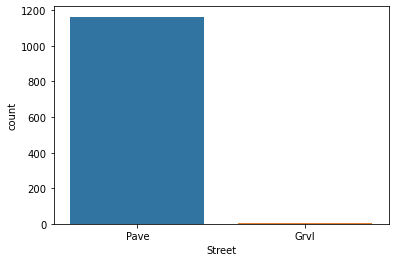

In [32]:
sns.countplot(df['Street'],data=df)

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='count'>

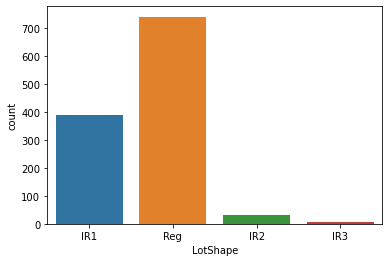

In [33]:
sns.countplot(df['LotShape'],data=df)

mostly the shape of property is regular followed by slightly irregular 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandContour', ylabel='count'>

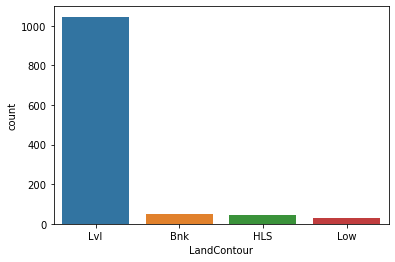

In [34]:
sns.countplot(df['LandContour'],data=df)

mostly flat area property is demanded 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Utilities', ylabel='count'>

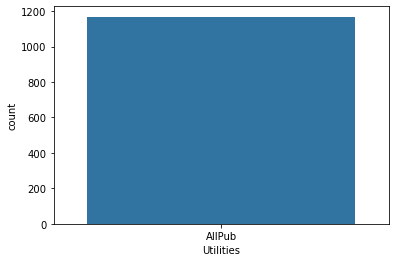

In [35]:
sns.countplot(df['Utilities'],data=df)

demand of all public utilities are demanded All public Utilities (E,G,W,& S)

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotConfig', ylabel='count'>

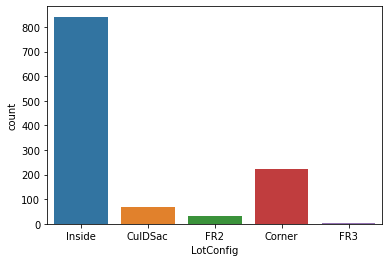

In [36]:
sns.countplot(df['LotConfig'],data=df)

mostly inside lot is demaned 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandSlope', ylabel='count'>

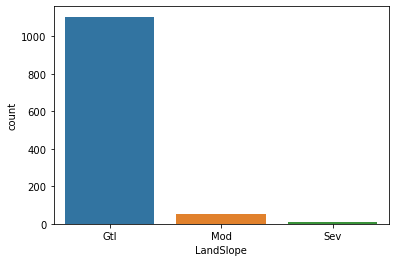

In [37]:
sns.countplot(df['LandSlope'],data=df)

Gentle slope is mostly preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

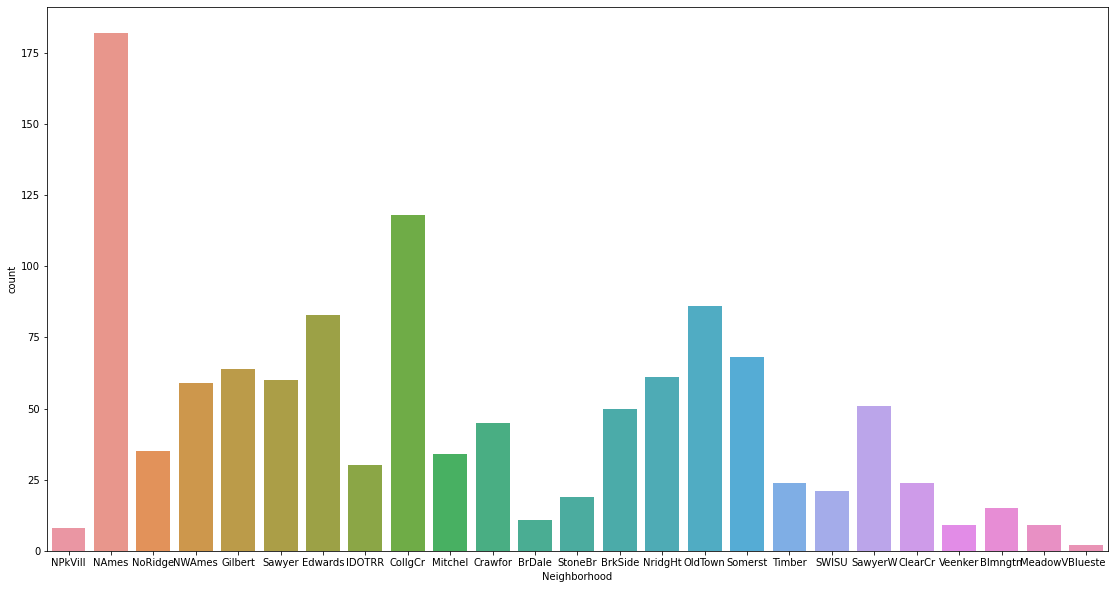

In [38]:
plt.figure(figsize=(19,10))

sns.countplot(df['Neighborhood'],data=df)

North Ames is preffered

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition1', ylabel='count'>

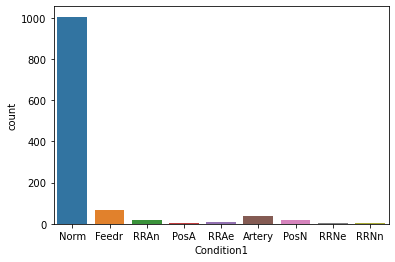

In [39]:
sns.countplot(df['Condition1'],data=df)

normal condition is preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition2', ylabel='count'>

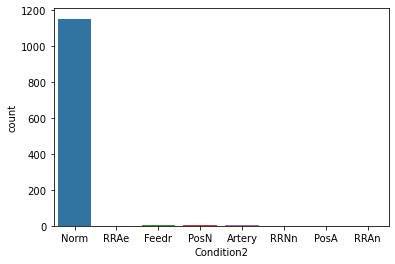

In [40]:
sns.countplot(df['Condition2'],data=df)

normal condition is preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BldgType', ylabel='count'>

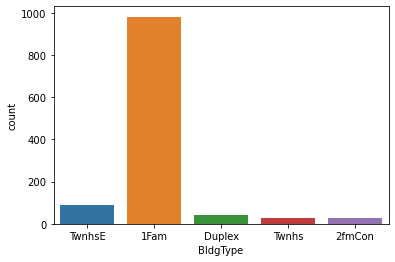

In [41]:
sns.countplot(df['BldgType'],data=df)

Single-family Detached type of dwelling mostly preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

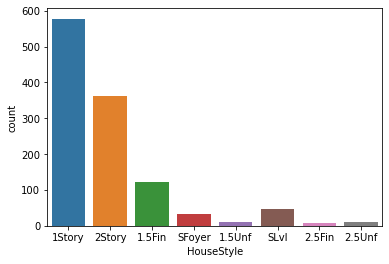

In [42]:
sns.countplot(df['HouseStyle'],data=df)

1 story is mostly preffered followed by 2

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

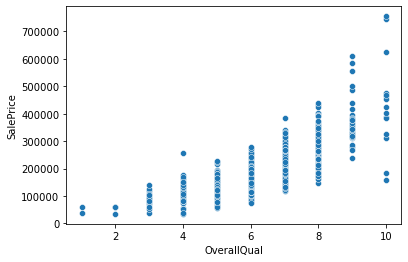

In [43]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

with increase of price overall quality is increasing 

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

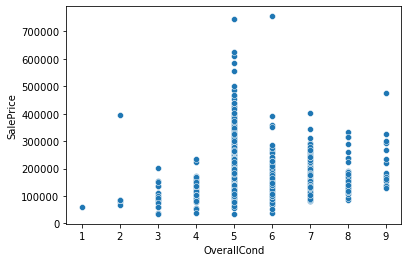

In [44]:
sns.scatterplot(x='OverallCond',y='SalePrice',data=df)

there is not much inpact of price over the condition 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

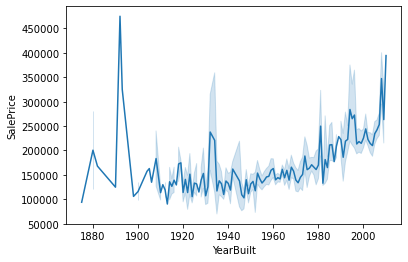

In [45]:
sns.lineplot(x='YearBuilt',y='SalePrice',data=df)

ealier the rates were high then decrese and after 2000 expected to be increase 

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

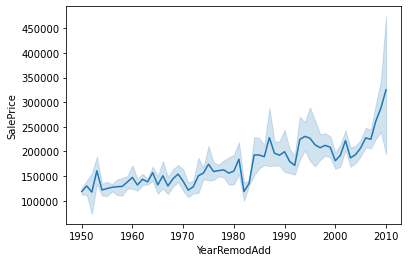

In [46]:
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=df)

as the time passes remodeling is preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

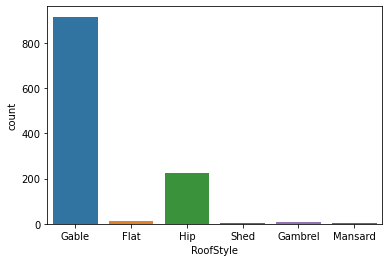

In [47]:
sns.countplot(df['RoofStyle'],data=df)

Gable roof is preffered then hip

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

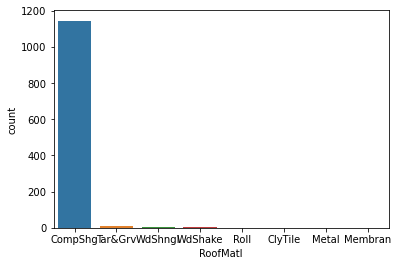

In [48]:
sns.countplot(df['RoofMatl'],data=df)

Standard (Composite) Shingle is preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

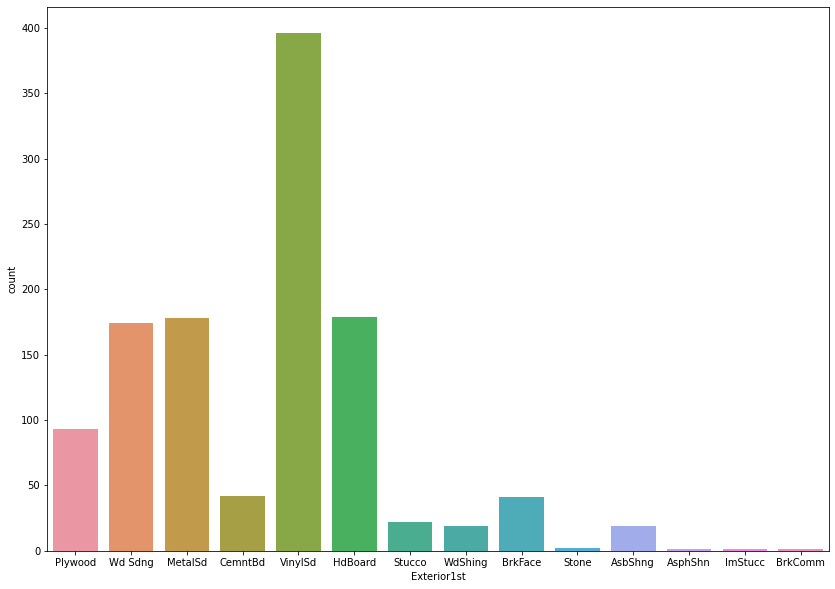

In [49]:
plt.figure(figsize=(14,10))
sns.countplot(df['Exterior1st'],data=df)

Vinyl Siding is mostly preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

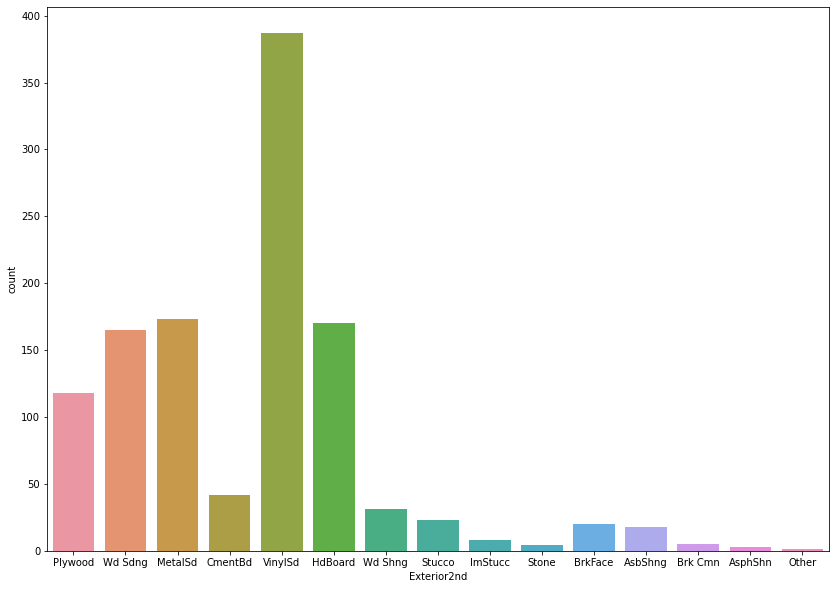

In [50]:
plt.figure(figsize=(14,10))

sns.countplot(df['Exterior2nd'],data=df)

Vinyl Siding is preffered 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

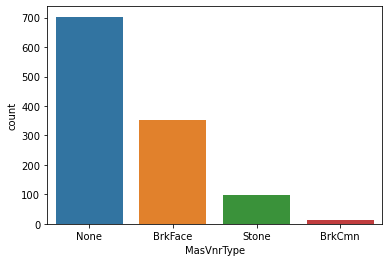

In [51]:
sns.countplot(df['MasVnrType'],data=df)

not much ideas 

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

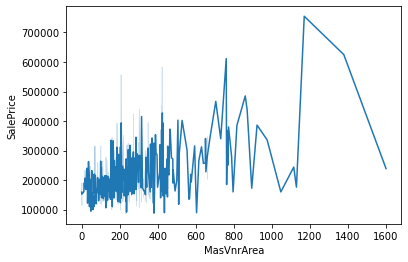

In [52]:
sns.lineplot(x='MasVnrArea',y='SalePrice',data=df)

ealier with increase in Masonry veneer area the price were very high but there is a sudden deep fall 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExterQual', ylabel='count'>

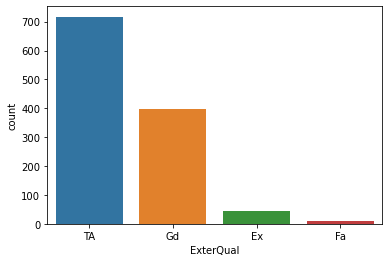

In [53]:
sns.countplot(df['ExterQual'],data=df)

exterior quality is mostly Average/Typical

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExterCond', ylabel='count'>

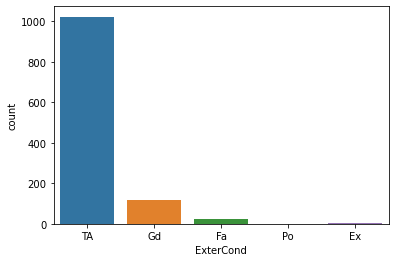

In [54]:
sns.countplot(df['ExterCond'],data=df)

Average/Typical condition of the exterior material 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Foundation', ylabel='count'>

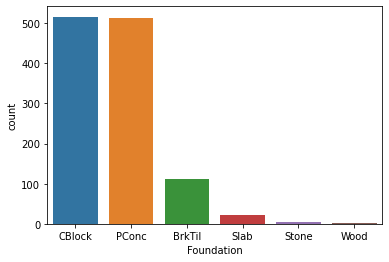

In [55]:
sns.countplot(df["Foundation"],data=df)

Poured Contrete	 and Brick & Tile are mostly used 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

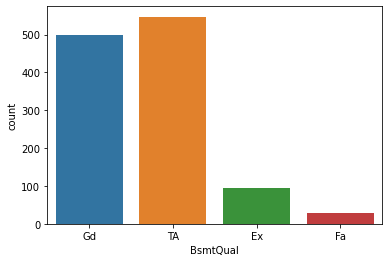

In [56]:
sns.countplot(df["BsmtQual"],data=df)

height of the basement is Typical (80-89 inches) then Good (90-99 inches)

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

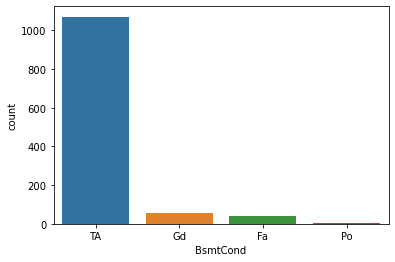

In [57]:
sns.countplot(df["BsmtCond"],data=df)

 general condition of the basement is Typical - slight dampness allowed

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

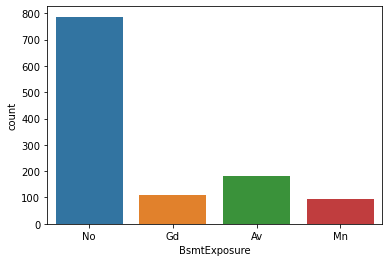

In [58]:
sns.countplot(df["BsmtExposure"],data=df)

walkout or garden level walls  is No Exposure

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

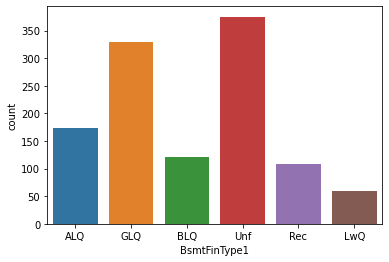

In [59]:
sns.countplot(df["BsmtFinType1"],data=df)

Rating of basement finished area is mostly Unfinshed then Good Living Quarters

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

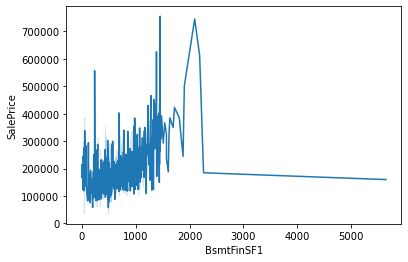

In [60]:
sns.lineplot(x='BsmtFinSF1',y='SalePrice',data=df)

Type 1 finished square feet increase with contant price 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

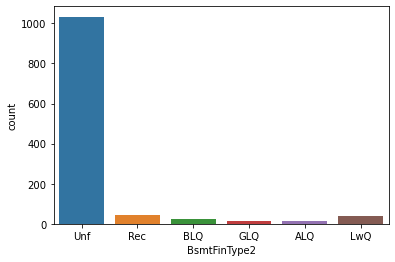

In [61]:
sns.countplot(df["BsmtFinType2"],data=df)

Rating of basement finished area mostly Unfinshed

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

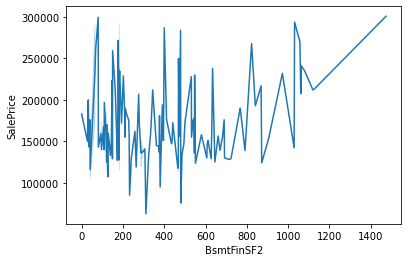

In [62]:
sns.lineplot(x='BsmtFinSF2',y='SalePrice',data=df)

Type 2 finished square feet increase with lot much increase in price 

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

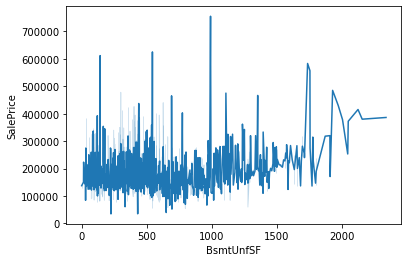

In [63]:
sns.lineplot(x='BsmtUnfSF',y='SalePrice',data=df)

Unfinished square feet of basement area seems to be decresing 

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

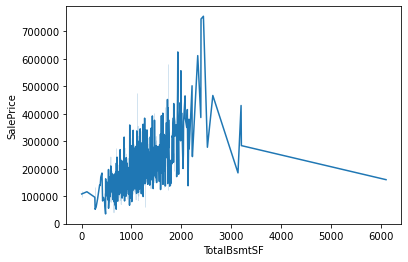

In [64]:
sns.lineplot(x='TotalBsmtSF',y='SalePrice',data=df)

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heating', ylabel='count'>

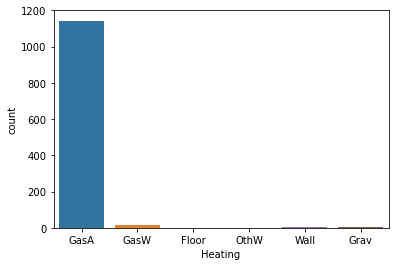

In [65]:
sns.countplot(df["Heating"],data=df)

Gas forced warm air furnace is mostly used for heating  

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

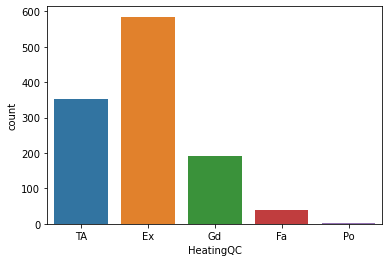

In [66]:
sns.countplot(df["HeatingQC"],data=df)

Heating quality and condition    is Excellent then average 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CentralAir', ylabel='count'>

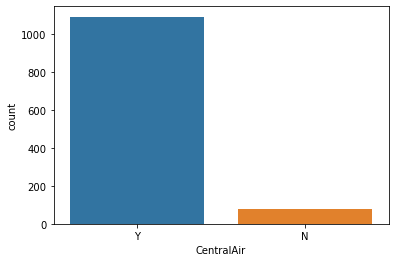

In [67]:
sns.countplot(df["CentralAir"],data=df)

yes there is central air conditioning  

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electrical', ylabel='count'>

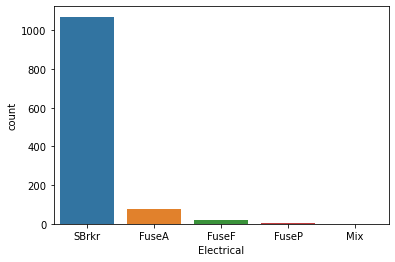

In [68]:
sns.countplot(df["Electrical"],data=df)

electrical system is mostly Standard Circuit Breakers & Romex

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

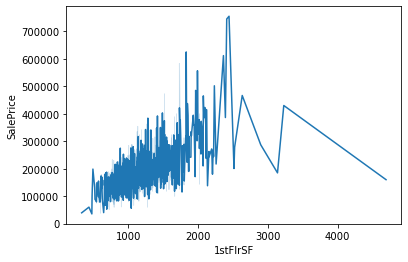

In [69]:
sns.lineplot(x='1stFlrSF',y='SalePrice',data=df)

First Floor square feet is decresing with decreasing rate 

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

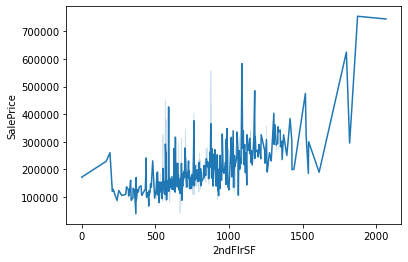

In [70]:
sns.lineplot(x='2ndFlrSF',y='SalePrice',data=df)

 Second floor square feet increasing with increasing rate 

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

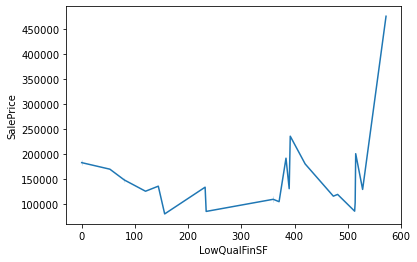

In [71]:
sns.lineplot(x='LowQualFinSF',y='SalePrice',data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

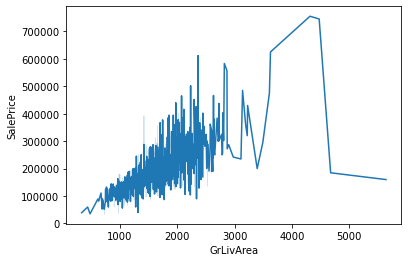

In [72]:
sns.lineplot(x='GrLivArea',y='SalePrice',data=df)

Above grade (ground) living area square feet increasing with decreasing rate 

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

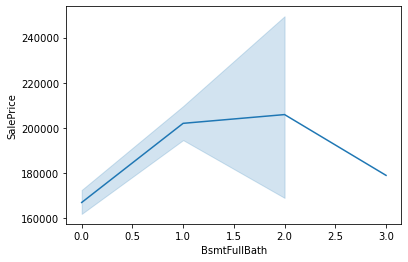

In [73]:
sns.lineplot(x='BsmtFullBath',y='SalePrice',data=df)

Basement full bathrooms increasing 

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

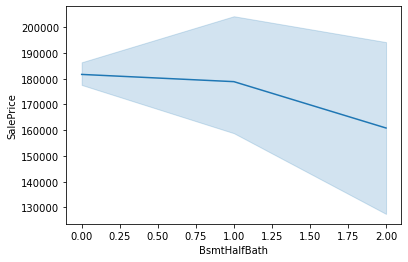

In [74]:
sns.lineplot(x='BsmtHalfBath',y='SalePrice',data=df)

Basement half bathrooms with decreasing preice 

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

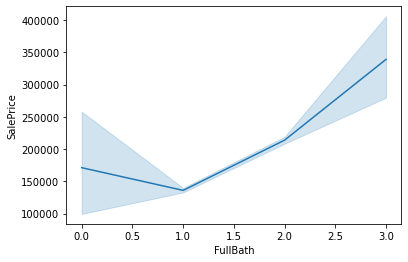

In [75]:
sns.lineplot(x='FullBath',y='SalePrice',data=df)

 Full bathrooms above grade is increasing with increasing price 

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

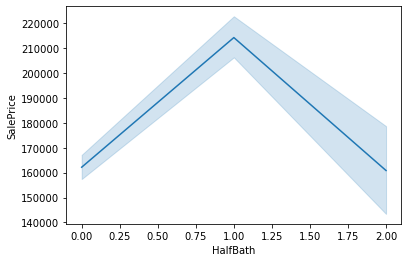

In [76]:
sns.lineplot(x='HalfBath',y='SalePrice',data=df)

Half baths above grade is increasing wih decreasing price 

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

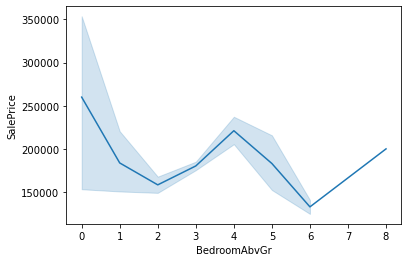

In [77]:
sns.lineplot(x='BedroomAbvGr',y='SalePrice',data=df)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

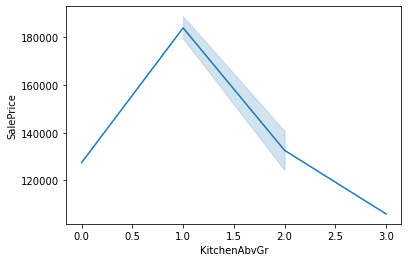

In [78]:
sns.lineplot(x='KitchenAbvGr',y='SalePrice',data=df)

kitchen grade is increasing with decreasing price 

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

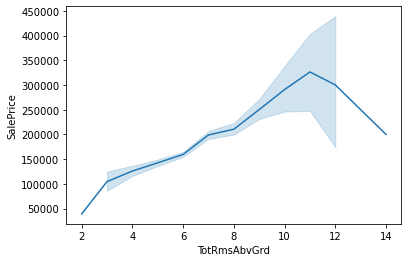

In [79]:
sns.lineplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

Total rooms above grade is increasing with decreasing price 

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

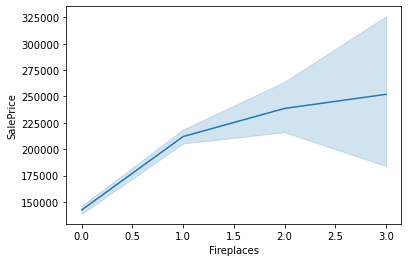

In [80]:
sns.lineplot(x='Fireplaces',y='SalePrice',data=df)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

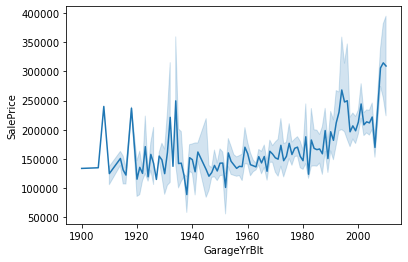

In [81]:
sns.lineplot(x='GarageYrBlt',y='SalePrice',data=df)

Year garage was built trend of garage 

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

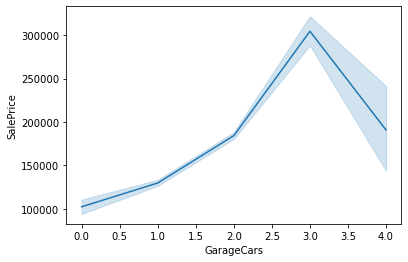

In [82]:
sns.lineplot(x='GarageCars',y='SalePrice',data=df)

Size of garage in car capacity is increasing 

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

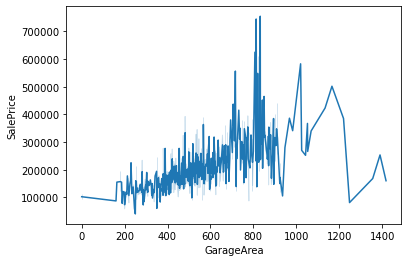

In [83]:
sns.lineplot(x='GarageArea',y='SalePrice',data=df)

Size of garage in square feet
 increasing 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageQual', ylabel='count'>

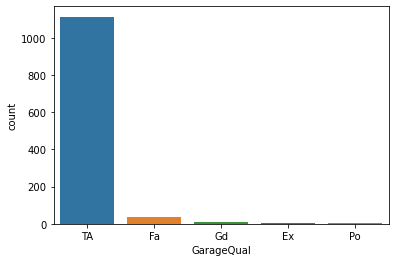

In [84]:
sns.countplot(df["GarageQual"],data=df)

Typical/Average garage quality 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageCond', ylabel='count'>

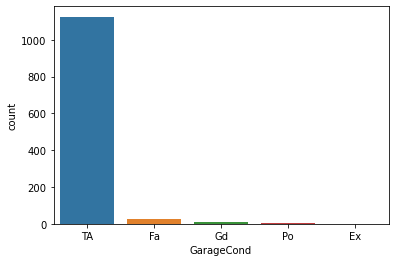

In [85]:
sns.countplot(df["GarageCond"],data=df)

Garage condition is average 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

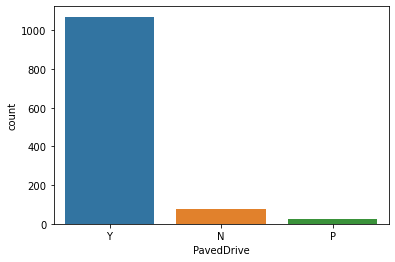

In [86]:
sns.countplot(df["PavedDrive"],data=df)

yes paved is preffered 

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

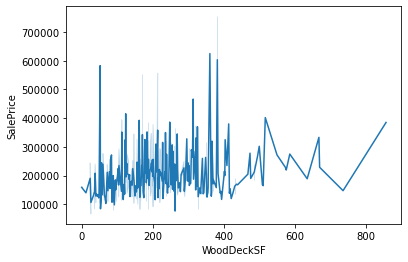

In [87]:
sns.lineplot(x='WoodDeckSF',y='SalePrice',data=df)

Wood deck area in square feet increasing 

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

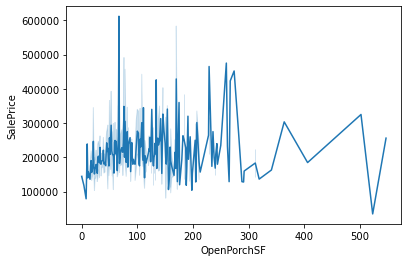

In [88]:
sns.lineplot(x='OpenPorchSF',y='SalePrice',data=df)

Open porch area in square feet increasing 

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

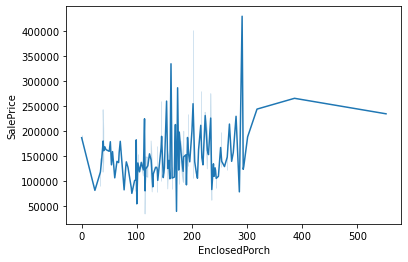

In [89]:
sns.lineplot(x='EnclosedPorch',y='SalePrice',data=df)

Enclosed porch area in square feet increasing 

sns.lineplot(x='3SsnPorch',y='SalePrice',data=df)

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

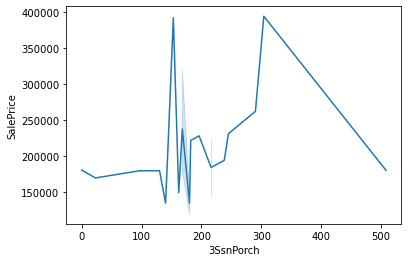

In [90]:
sns.lineplot(x='3SsnPorch',y='SalePrice',data=df)

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

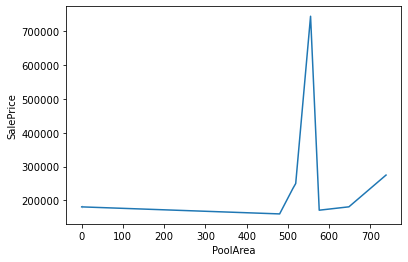

In [91]:
sns.lineplot(x='PoolArea',y='SalePrice',data=df)

ool area in square feet increasing with less price 

sns.lineplot(x='MiscVal',y='SalePrice',data=df)

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

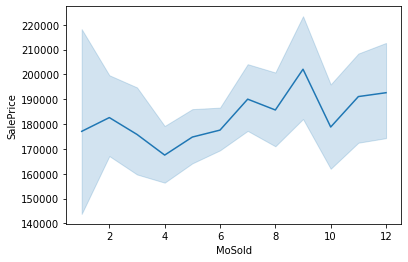

In [92]:
sns.lineplot(x='MoSold',y='SalePrice',data=df)

august to october max sales 

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

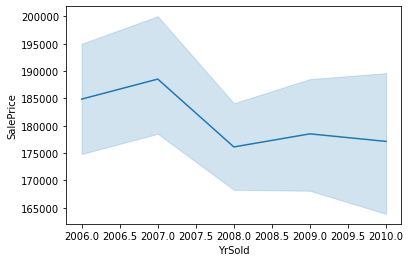

In [93]:
sns.lineplot(x='YrSold',y='SalePrice',data=df)

sales are contant 

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleType', ylabel='count'>

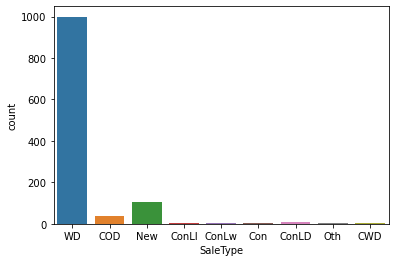

In [94]:
sns.countplot(df['SaleType'],data=df)

sales types max are Warranty Deed - Conventional

C:\Users\shubham aggarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

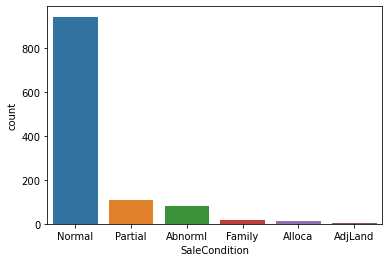

In [95]:
sns.countplot(df['SaleCondition'],data=df)

sales condition Normal Sale

In [96]:
from sklearn.preprocessing import LabelEncoder


In [97]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-97-0134b5f5b5b2>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


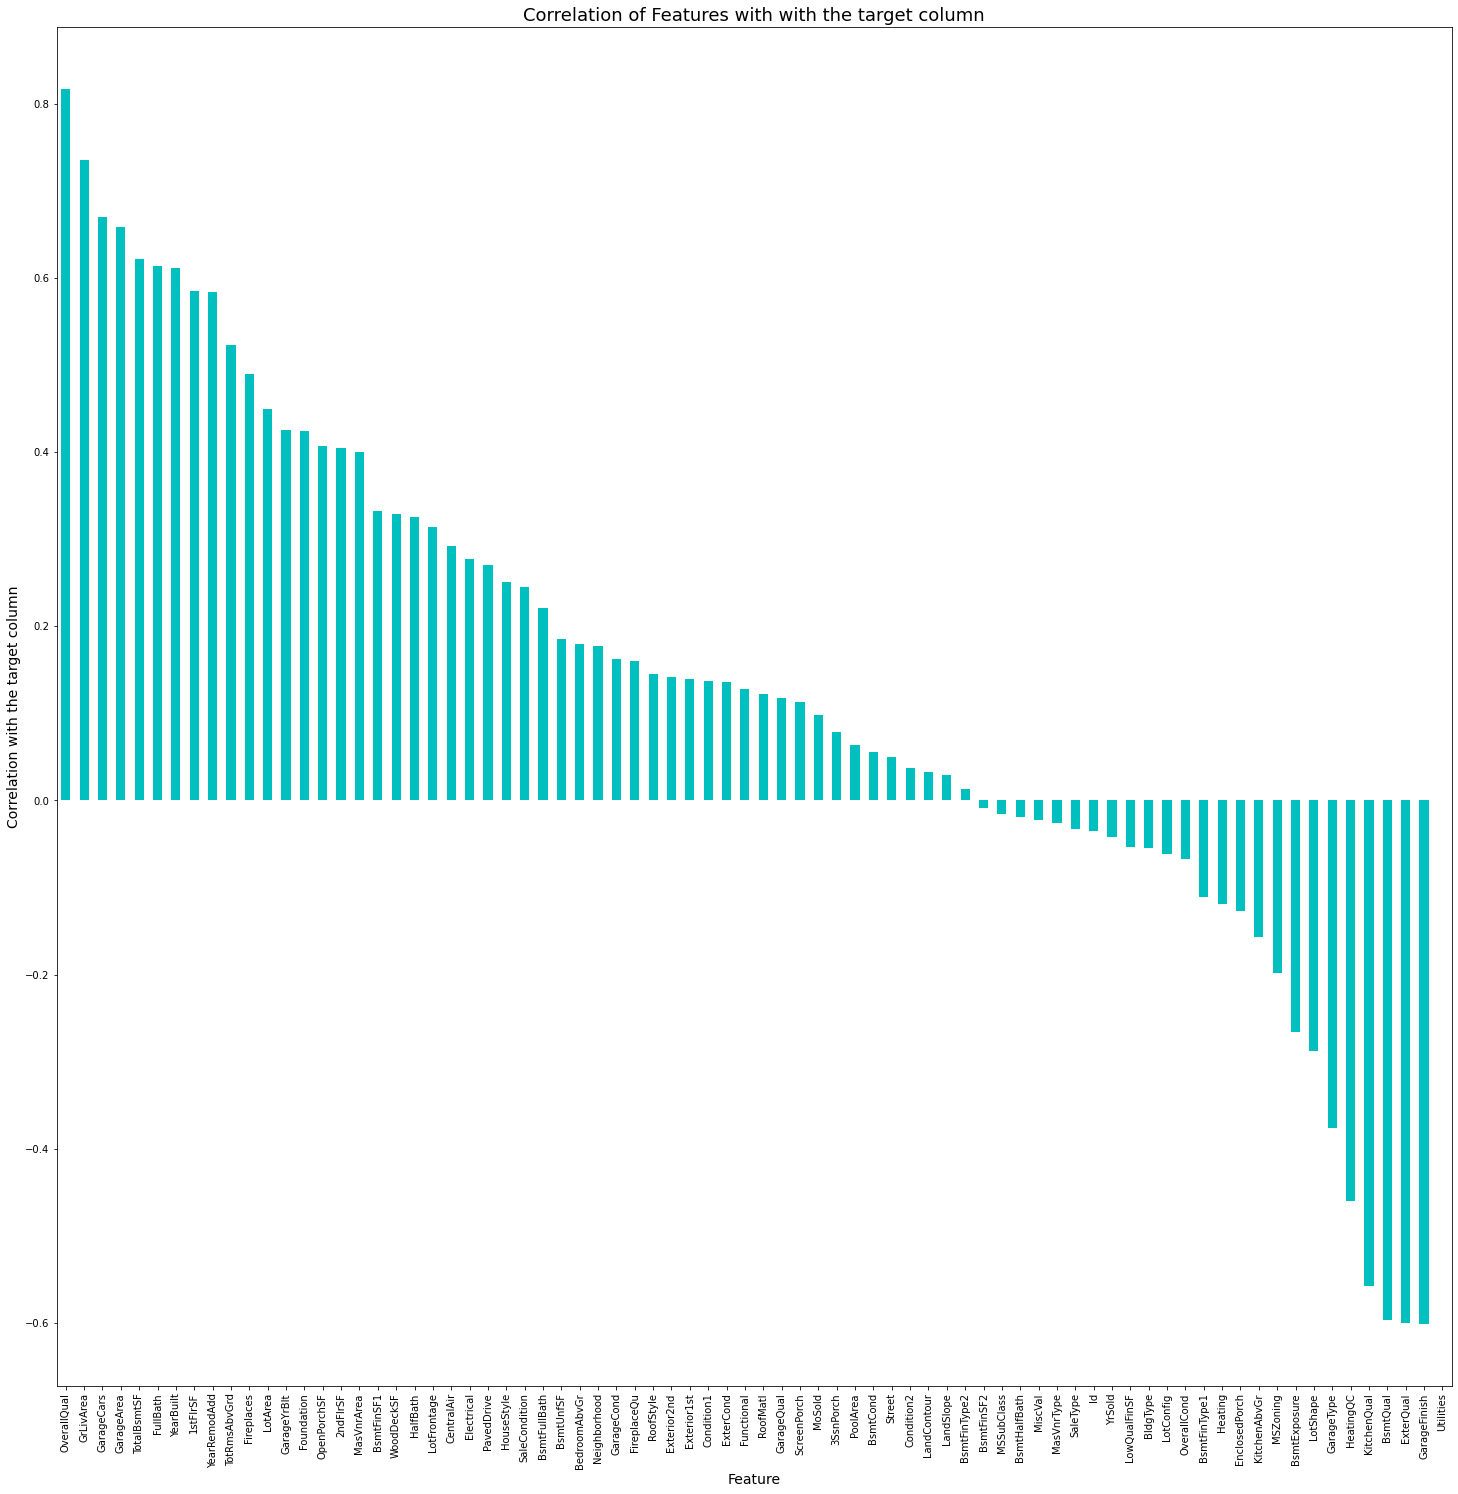

In [98]:
plt.figure(figsize=(25,25))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()

In [99]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.010555,0.008739,-0.006103,-0.003123,0.003303,0.022605,-0.020308,NaN,0.054021,...,0.010115,-0.014125,0.001856,0.065065,0.016537,0.024028,-0.009118,0.024640,-0.015146,-0.034556
MSSubClass,0.010555,1.000000,0.013516,-0.294350,-0.289010,-0.029520,0.076645,-0.021033,NaN,0.066929,...,0.004240,-0.047855,-0.003655,0.019977,-0.030254,0.005488,-0.039245,0.045454,-0.033527,-0.015062
MSZoning,0.008739,0.013516,1.000000,-0.069661,-0.050498,0.140215,0.053655,0.001175,NaN,-0.027246,...,0.108786,0.003334,0.023698,-0.001502,0.011956,-0.051646,-0.004964,0.079854,0.004501,-0.198318
LotFrontage,-0.006103,-0.294350,-0.069661,1.000000,0.530008,-0.035309,-0.144523,-0.073451,NaN,-0.192468,...,0.015932,0.048181,0.032681,0.099282,-0.005317,0.022517,-0.003885,-0.035356,0.065091,0.313898
LotArea,-0.003123,-0.289010,-0.050498,0.530008,1.000000,-0.059142,-0.305133,-0.017495,NaN,-0.202196,...,-0.006930,0.076288,0.071519,0.076404,0.075370,0.012867,-0.041749,-0.033343,0.057748,0.449715
Street,0.003303,-0.029520,0.140215,-0.035309,-0.059142,1.000000,-0.012941,0.105226,NaN,0.000153,...,0.020713,0.007247,0.015272,0.004069,-0.134283,-0.008860,-0.019635,0.025920,0.014176,0.049819
LotShape,0.022605,0.076645,0.053655,-0.144523,-0.305133,-0.012941,1.000000,0.081803,NaN,0.211395,...,0.071237,-0.018852,-0.057627,-0.023309,-0.021309,-0.050418,0.021421,-0.015161,-0.054905,-0.287903
LandContour,-0.020308,-0.021033,0.001175,-0.073451,-0.017495,0.105226,0.081803,1.000000,NaN,-0.031496,...,-0.057998,-0.026729,0.020257,0.011627,0.024414,-0.023872,0.009499,-0.041763,0.047715,0.032355
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,0.054021,0.066929,-0.027246,-0.192468,-0.202196,0.000153,0.211395,-0.031496,NaN,1.000000,...,-0.067297,-0.047424,0.002315,-0.031885,-0.009810,0.019084,-0.009817,-0.002039,0.043692,-0.061521


In [100]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [101]:
df.drop(['BsmtFinSF2','BsmtFinType2'],axis=1,inplace=True)    #droping the column with least correlation 

In [102]:
df.drop(["Id"],axis=1,inplace=True)

In [103]:
df.shape



(1168, 74)

In [104]:
x= df.iloc[:,0:-1]

In [105]:
y = df.iloc[:,-1]

In [106]:
x.shape


(1168, 73)

In [107]:
y.shape

(1168,)

In [108]:
from sklearn.decomposition import PCA
pca_house = PCA(n_components=8)
principalComponents_house = pca_house.fit_transform(x)

In [109]:
x = pd.DataFrame(data = principalComponents_house
             , columns = ['p1','p2','p3','p4','p5','p5','p7','p8'])

In [110]:
x

,p1,p2,p3,p4,p5,p5,p7,p8
0,-372.299011,-258.959957,238.318478,-94.902281,26.651805,-91.913199,6.131011,-19.128533
1,662.025337,-217.657112,1.544138,-261.571888,-164.343234,56.931176,13.653169,-42.749663
2,146.097393,188.438580,-95.710800,136.024750,-261.158685,-71.176513,-83.940306,35.600125
3,630.773866,-97.876205,257.136882,19.950287,198.872154,13.632369,-109.794747,-83.003901
4,510.254357,317.779089,17.705204,-228.732874,1.214182,-28.778453,-64.062656,60.122576
5,171.806179,-255.372674,-440.391684,-15.084435,-17.201107,-150.839539,64.300389,-13.287701
6,249.913043,434.827145,97.023725,-103.789290,37.210013,-4.095252,-33.320510,-69.488644
7,334.559349,38.991559,-141.486719,-145.543028,-64.333948,315.374528,78.807459,-55.245538
8,-57.431266,134.400720,147.348773,-157.328240,-47.681831,-30.456463,-34.937089,-48.346196
9,-332.892373,50.785125,-36.924697,-25.540650,2.622644,-28.921608,-47.460552,45.605684


In [111]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")


In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [139]:
import sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score



lr=LinearRegression()

In [114]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 658  The model performs very well
At random_state:- 658
Training r2_score is:- 76.2280426092175
Testing r2_score is:- 76.22755801902797


In [115]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=658,test_size=0.30)

In [116]:
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [117]:
lr.score(x_test,y_test)


0.7835156613866192

In [118]:
pred=lr.predict(x_test)


In [119]:
mean_absolute_error(pred,y_test)


53.62953299801148

In [120]:
mean_squared_error(pred,y_test)


4813.935784083874

In [121]:
!pip install xgboost
from xgboost import XGBRegressor

In [122]:
xgb1 = XGBRegressor()


In [123]:
parameters = {
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'n_estimators': [500]}

In [124]:
xgb = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [125]:
xgb.fit(x_train,y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [126]:
best_parametres = xgb.best_params_
print(best_parametres)

{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 500}


In [127]:
xgb.best_score_


0.7328691271511485

In [128]:
xgb = XGBRegressor(learning_rate = 0.03,max_depth=5,n_estimators = 500)


In [129]:
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
pred= xgb.predict(x_test)


In [131]:
xg= r2_score(y_test,pred)


In [132]:
xg

0.7868391611359301

In [133]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute Error: 51.474328285608536
Mean Squared Error: 4740.031526278997
Root Mean Square Error: 68.84788686865413


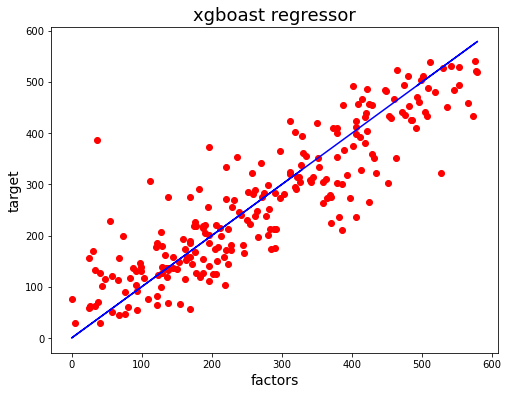

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('factors',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('xgboast regressor',fontsize=18)
plt.show()

In [135]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [140]:
rd = Ridge(alpha=1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred = rd.predict(x_test)

rds = r2_score(y_test,pred)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=3)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 57.74394744257133
Cross Val Score: 56.81146175457328


In [137]:
ds = pd.read_csv("housetest.csv")

In [138]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
8,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,396,0,NaN,NaN,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [141]:
ds.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True) 

In [142]:
ds.drop(['BsmtFinSF2','BsmtFinType2','Id'],axis=1,inplace=True)    #droping the column with least correlation 

<AxesSubplot:>

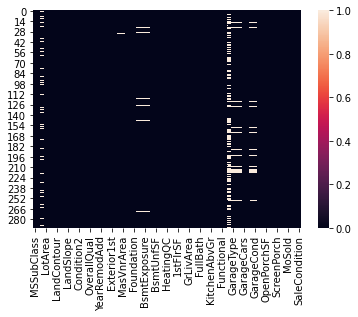

In [144]:

sns.heatmap(ds.isnull())

In [160]:
#Missinf Features of  Dataset
missing_features=[features for features in ds.columns if ds[features].isnull().sum()>1]

for feature in missing_features:
    print(feature,np.round(ds[feature].isnull().mean()*100,4),'% missing values')

In [146]:
ds["LotFrontage"]=ds["LotFrontage"].fillna(ds["LotFrontage"].mode()[0])

In [147]:
ds["BsmtQual"]=ds["BsmtQual"].fillna(ds["BsmtQual"].mode()[0])

In [148]:
ds["BsmtCond"]=ds["BsmtCond"].fillna(ds["BsmtCond"].mode()[0])

In [149]:
ds["BsmtExposure"]=ds["BsmtExposure"].fillna(ds["BsmtExposure"].mode()[0])

In [151]:
ds["BsmtFinType1"]=ds["BsmtFinType1"].fillna(ds["BsmtFinType1"].mode()[0])

In [152]:
ds["GarageType"]=ds["GarageType"].fillna(ds["GarageType"].mode()[0])

In [153]:
ds["GarageYrBlt"]=ds["GarageYrBlt"].fillna(ds["GarageYrBlt"].mode()[0])

In [154]:
ds["GarageFinish"]=ds["GarageFinish"].fillna(ds["GarageFinish"].mode()[0])

In [155]:
ds["GarageQual"]=ds["GarageQual"].fillna(ds["GarageQual"].mode()[0])

In [156]:
ds["GarageCond"]=ds["GarageCond"].fillna(ds["GarageCond"].mode()[0])

In [158]:
ds.drop(['FireplaceQu'],axis=1,inplace=True)

<AxesSubplot:>

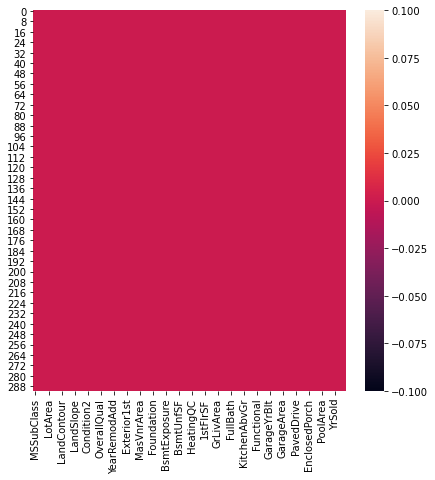

In [186]:
plt.figure(figsize=(7,7))


sns.heatmap(ds.isnull())

In [161]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorc

In [162]:
ds["Exterior1st"]=ds["Exterior1st"].fillna(ds["Exterior1st"].mode()[0])

In [167]:

ds["MasVnrArea"]=ds["MasVnrArea"].fillna(ds["MasVnrArea"].mode()[0])

In [170]:

ds["Electrical"]=ds["Electrical"].fillna(ds["Electrical"].mode()[0])

In [172]:


ds["Exterior2nd"]=ds["Exterior2nd"].fillna(ds["Exterior2nd"].mode()[0])

In [184]:


ds["MasVnrType"]=ds["MasVnrType"].fillna(ds["MasVnrType"].mode()[0])

In [185]:
ds.isnull().sum().sort_values(ascending=False)


MSSubClass       0
MSZoning         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 72, dtype: int64

In [188]:
ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,60.0,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,60.0,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,18,0,0,0,0,0,1,2008,WD,Normal
5,180,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,12,2007,WD,Normal
6,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,28,0,0,0,0,0,5,2006,WD,Normal
7,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,0,1,2008,New,Partial
8,80,RL,60.0,12800,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,396,0,0,8,2009,WD,Normal
9,120,RM,32.0,4500,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,247,0,0,0,0,0,6,2009,WD,Normal


In [190]:
from sklearn.decomposition import PCA
pca_houset = PCA(n_components=8)
principalComponents_houset = pca_houset.fit_transform(x)

In [191]:
s = pd.DataFrame(data = principalComponents_houset
             , columns = ['p1','p2','p3','p4','p5','p5','p7','p8'])

In [192]:
s

,p1,p2,p3,p4,p5,p5,p7,p8
0,-0.137137,-0.909030,0.602305,0.374807,0.993280,-0.055661,-0.842304,-1.588814
1,0.373519,1.901091,-0.579297,-0.882599,1.545633,-0.453445,-0.858944,0.768696
2,0.687164,-0.519815,-1.698973,-1.000820,-1.084916,-1.321709,0.255999,-0.181121
3,-0.607715,2.230776,-0.744238,0.353509,0.751295,1.202579,1.189910,-1.460701
4,0.002986,1.453734,0.337177,-0.095865,-0.527376,-2.047159,0.747077,0.113792
5,2.406981,-0.864923,1.027647,-1.950440,0.382007,0.217825,0.314703,-0.336638
6,0.580989,1.904103,-0.312536,1.344628,-0.979598,-0.057881,0.140179,-0.216828
7,-0.187330,1.811523,-0.278926,0.126082,0.420321,0.835894,-0.705271,2.374183
8,0.111319,0.922583,-0.185204,0.616951,-0.136669,-0.334549,-0.771769,-0.687493
9,-0.666898,-0.782453,0.403249,-0.239629,-0.751766,-0.424842,-0.142324,-0.236683


In [193]:
pred= xgb.predict(s)


In [194]:
pred

array([139.1274 , 252.5544 , 306.46478, ..., 278.3955 , 120.23088,
       290.7795 ], dtype=float32)

In [195]:
pd.DataFrame(pred)

,0
0,139.127396
1,252.554398
2,306.464783
3,132.818512
4,334.299255
5,468.114075
6,382.475891
7,268.794495
8,298.450256
9,145.932236
